In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

from collections import Counter
from utils import *


In [2]:
def missed_alleles_per_ancestry(pre,gs):
    groupscsv = "../datasets/SraRunTableD1.txt"
    groups = pd.read_csv(groupscsv)
    
    results = []

    for group, df_by_group in groups.groupby('Population'):
        accession_numbers = df_by_group['Run'].values.tolist()
        gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
        gs_final = gs_final.iloc[: ,:]
        

        ret = get_inaccurate_alleles(pre,gs_final)
        results.append(ret)

    yorubaresult = results[4]
    europeanresult = sum_euro_groups(results[0:4],True)

    return yorubaresult, europeanresult

In [3]:
data = list()
tools=["hlaforest","optitype","phlat","seq2hla","rna2hla","arcas","hlavbseq","hlahd"]

yoruba_missed_alleles = []
europe_missed_alleles = []

for t in tools:
    gs=pd.read_csv("../datasets/1_gs.csv")
    pre=pd.read_csv("../results/standard/"+str(t)+"_d1.csv")
        
    results = missed_alleles_per_ancestry(pre,gs)
    
    for i in results[0]:
        yoruba_missed_alleles.append(i)
    for i in results[1]:
        europe_missed_alleles.append(i)
    



In [4]:
ycounts = Counter(yoruba_missed_alleles)
ecounts = Counter(europe_missed_alleles)

print(ycounts)
print(ecounts)

Counter({'DQB1*02:01': 81, 'B*53:01': 37, 'DQB1*04:02': 33, 'DQB1*03:01': 24, 'DQB1*06:03': 21, 'DRB1*08:04': 21, 'DQB1*05:01': 20, 'DRB1*13:01': 17, 'DRB1*07:01': 17, 'DRB1*13:03': 16, 'DRB1*15:03': 16, 'DQB1*06:02': 13, 'B*52:01': 11, 'DRB1*13:02': 11, 'DRB1*14:01': 10, 'DRB1*03:02': 10, 'DQB1*05:02': 10, 'DRB1*11:04': 9, 'DRB1*03:01': 9, 'A*30:01': 9, 'DQB1*06:05': 8, 'B*42:01': 7, 'C*17:01': 7, 'A*24:24': 6, 'A*30:02': 6, 'C*04:01': 6, 'B*58:01': 4, 'C*07:02': 4, 'DRB1*11:01': 4, 'DRB1*01:01': 4, 'B*49:01': 3, 'B*35:01': 3, 'B*07:02': 3, 'C*16:01': 3, 'DRB1*11:02': 3, 'DQB1*05:03': 3, 'A*23:01': 2, 'B*56:01': 2, 'C*07:01': 2, 'DRB1*12:01': 2, 'B*45:01': 2, 'DRB1*09:01': 2, 'DRB1*04:03': 2, 'DQB1*03:02': 2, 'B*41:04': 2, 'DRB1*13:27': 2, 'DRB1*13:35': 2, 'DQB1*06:04': 2, 'B*51:01': 1, 'B*42:02': 1, 'C*08:02': 1, 'C*08:04': 1, 'A*26:01': 1, 'A*02:01': 1, 'A*36:01': 1, 'DRB1*01:02': 1, 'C*14:02': 1, 'A*01:01': 1, 'B*57:03': 1})
Counter({'DQB1*02:01': 337, 'DQB1*03:01': 198, 'DRB1*15:0

In [5]:
allele_intersection = list(set(ycounts.keys()) & set(ecounts.keys()))

intersection = []

for allele in allele_intersection:
    intersection.append([allele,ycounts[allele],ecounts[allele],ecounts[allele]+ycounts[allele]])

df = pd.DataFrame (intersection, columns = ['allele','yoruba','Europe','total'])
df = df.sort_values(by=['total'],ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        allele  yoruba  Europe  total
7   DQB1*02:01      81     337    418
26  DQB1*03:01      24     198    222
2   DRB1*07:01      17     161    178
3   DQB1*05:01      20     145    165
42  DQB1*06:02      13     149    162
36  DQB1*03:02       2     143    145
15  DQB1*04:02      33      97    130
9   DRB1*01:01       4     102    106
30  DQB1*06:03      21      55     76
17  DRB1*03:01       9      64     73
33  DRB1*13:01      17      43     60
38     C*07:02       4      50     54
21  DRB1*11:01       4      48     52
6      A*02:01       1      45     46
39  DRB1*13:02      11      33     44
28  DRB1*14:01      10      30     40
35     B*53:01      37       3     40
1   DQB1*05:03       3      35     38
12  DRB1*11:04       9      21     30
14  DRB1*08:04      21       6     27
11  DQB1*05:02      10      17     27
22  DRB1*13:03      16      11     27
31     B*35:01       3      24     27
19  DQB1*06:04       2      24     26
41     A*30:01       9      14     23
5      B*07:

In [6]:
#normalize ot sample size for fair comparison for africa vs europe
intersection = np.array(intersection)   
intersection[:,1] = intersection[:,1].astype(float)/67
intersection[:,2] = intersection[:,2].astype(float)/423
intersection[:,3] = intersection[:,3].astype(float)/490


df = pd.DataFrame (intersection, columns = ['allele','yoruba','Europe','total'])
df = df.sort_values(by=['yoruba'],ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        allele                yoruba                 Europe  \
7   DQB1*02:01     1.208955223880597     0.7966903073286052   
35     B*53:01    0.5522388059701493  0.0070921985815602835   
15  DQB1*04:02    0.4925373134328358     0.2293144208037825   
26  DQB1*03:01    0.3582089552238806    0.46808510638297873   
30  DQB1*06:03   0.31343283582089554    0.13002364066193853   
14  DRB1*08:04   0.31343283582089554   0.014184397163120567   
3   DQB1*05:01   0.29850746268656714    0.34278959810874704   
33  DRB1*13:01    0.2537313432835821     0.1016548463356974   
2   DRB1*07:01    0.2537313432835821     0.3806146572104019   
22  DRB1*13:03   0.23880597014925373   0.026004728132387706   
42  DQB1*06:02   0.19402985074626866    0.35224586288416077   
39  DRB1*13:02   0.16417910447761194    0.07801418439716312   
25     B*52:01   0.16417910447761194   0.002364066193853428   
28  DRB1*14:01   0.14925373134328357    0.07092198581560284   
11  DQB1*05:02   0.14925373134328357    0.0401891252955

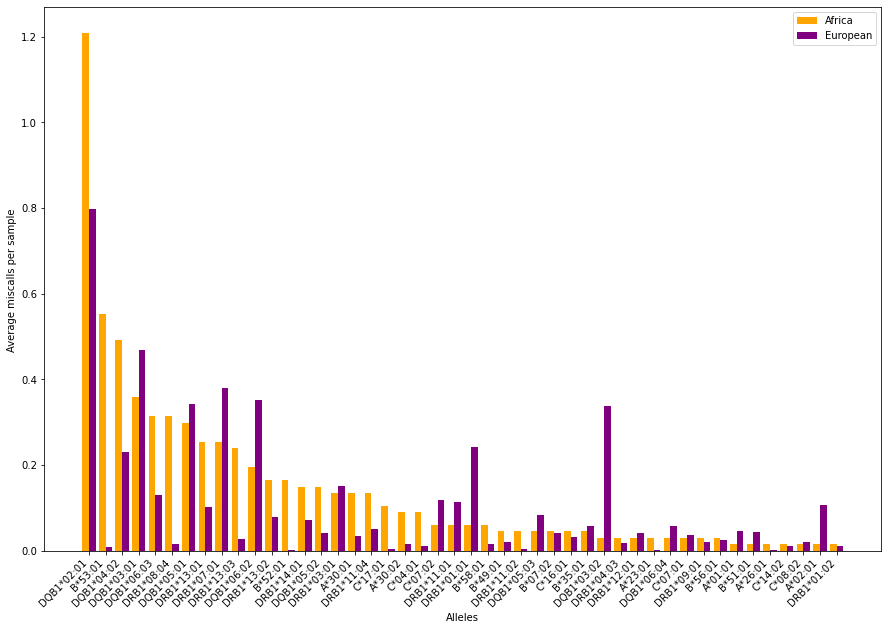

In [7]:
allele = np.array(df['allele'])
yoruba = np.array(df['yoruba'])
europe = np.array(df['Europe'])
total = np.array(df['total'])  

xaxis = np.arange(len(allele))
 
plt.figure(figsize = (15,10))

plt.bar(xaxis - 0.2, yoruba.astype(float), 0.4,color='orange')
plt.bar(xaxis + 0.2, europe.astype(float), 0.4, color='purple')
plt.legend(["Africa","European"])
plt.xticks(xaxis,allele,rotation=45, ha='right')
plt.xlabel("Alleles")
plt.ylabel("Average miscalls per sample ")

plt.show()

In [8]:
#yoruban: avg miscalls/sample
np.average(yoruba.astype(float))

0.14438676184295915

In [9]:
#european: avg miscalls/sample
np.average(europe.astype(float))

0.10412169801624009